# Data analysis

## Header 
Author : Amina Matt and Yichen Wang  
Date created : 18.12.2021  
Date last modified : 22.12.2021  
Python version : 3.8  
Description : Analyzing the dataset obtain from text processing

## Librairies

In [314]:
# -*- coding: utf-8 -*-
import json #for dumpint of dictionary into json files
import pandas as pd #Pandas provides data structure and data analysis tools
from pandas.io.json import json_normalize
import re
import matplotlib.pyplot as plt

## Data analysis

In [315]:
#transform JSON list into a dataframe 
a_file = open("./generated_data/from_caricom.json", "r")
jsonList = json.load(a_file)
df = pd.json_normalize(jsonList)

In [316]:
df.head()

,person,date,origin,colonial_Location,confidence_date,confidence_person,confidence_origin,activities,whole_entry
0,Arthur Thellusson,None,Geneva,Antigua and Barbuda,0,25.00,100.00,[slave owner],"=> Arthur Thellusson, son of Lord Rendlesham a..."
1,Jamaica Kincaid,None,None,Antigua and Barbuda,0,100.00,0.00,None,"=> In her book A Small Place (1988), the Antig..."
2,Hans Conrad Hottinger,None,Zurich,Antigua and Barbuda,0,25.00,100.00,[plantation owner],=> Hans Conrad Hottinger (Hottinguer) (1764–18...
3,Hans Conrad Hottinger,None,Saint-Aubin,Antigua and Barbuda,0,25.00,33.33,None,=> Hans Conrad Hottinger’s business partner wa...
4,Felix Christian Spoerri,1677,Zurich,Barbados,20.00,100.00,0.00,None,"=> In 1677, Swiss medical doctor Felix Christi..."


#### From other notebook

In [317]:
#cleaning of origin 
def clean_origin(origin): 
    '''
    Input: origin location from the caricom initial dataset
    Output: only city origin 
    Requirements: re library
    Description: Take out information in parenthesis, as well as extra whitespaces for better merging.
    '''
    if origin == None or origin == -1:
        return None
   
    #remove parenthesis and everything that comes after it 
    try :
        start = origin.index('(')
    except : 
        start = len(origin)
    origin = origin[0:start]
    #print(origin)
    
    #remove digits and symbols
    origin = re.sub('[^A-Za-z -.âü]+','',origin)
   
    #split version
    o_split = origin.split()
    
    cleanOrigin = ''
    
    for split in o_split:
        #print(split)
        #get rid of one letter word
        
        if len(split)>=2 and split[0].isupper():
            #print('will keep '+split)
            cleanOrigin = cleanOrigin+' '+split
            #print(cleanOrigin)
            cleanOrigin = cleanOrigin.strip()
        else :
            #print('will not keep '+split)
            cleanOrigin = None
            break
        
    if cleanOrigin == 'St.Gallen':
        cleanOrigin = 'St. Gallen'
        
    return cleanOrigin 

In [318]:
df['origin'] = df['origin'].apply(lambda x : clean_origin(x))
df = df.drop(df[df.origin ==''].index)

## Cities distribution 

In [319]:
def trick(city):
    if city == "Bâle": 
        return 'Basel'
    else :
        return city 

In [320]:
cities_df =df.drop(df[df.origin =='Switzerland'].index)  #remove switzerland as not precise enough
cities_df['origin'] = cities_df['origin'].apply(lambda x : trick(x))
cities = cities_df['origin'].value_counts().head(10).sort_values(ascending = True)


<ipython-input-321-bb8f613138a7>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(2, 2, 1)


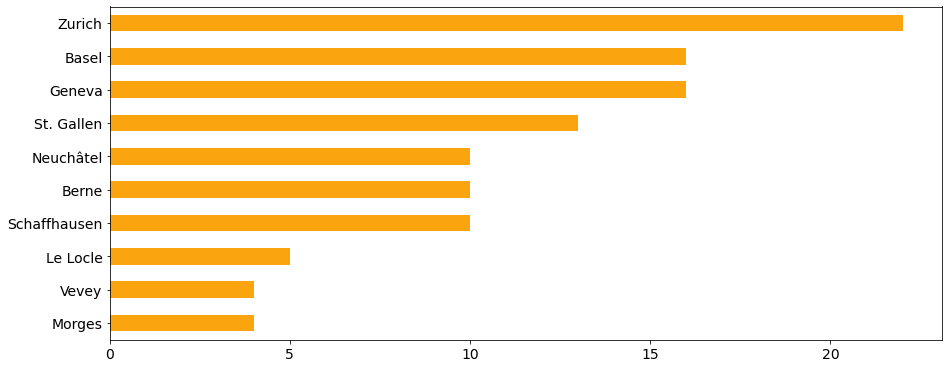

In [321]:
plt.figure(figsize=((25,10)))
plt.subplot(221)
ax1 = plt.subplot(2, 2, 1)
cities.plot.barh(color = '#FAA40F',fontsize=14,rot = 0).get_figure()
plt.savefig('./img/origins_dist_barh.png')
plt.tight_layout()
plt.show()

## Colonial locations 

In [322]:
col_Locations = df['colonial_Location'].value_counts().head(10).sort_values(ascending = True)

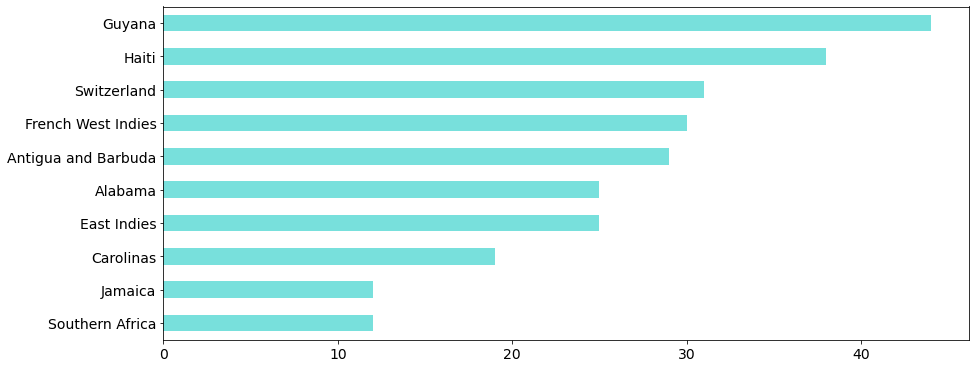

In [323]:
plt.figure(figsize=((25,10)))
ax2 = plt.subplot(2, 2, 2)
col_Locations.plot.barh(color = '#78E0DC',fontsize=14,rot = 0).get_figure()
plt.savefig('./img/colonial_locs_dist_barh.png')
plt.tight_layout()
plt.show()

## Activities 

In [327]:
df['slave owner activity'] = df['activities'].apply(lambda x : 'slave owner' in str(x))
df['trading activity'] = df['activities'].apply(lambda x : 'trading' in str(x))
df['military activity'] = df['activities'].apply(lambda x : 'military' in str(x))
df['plantation owner activity'] = df['activities'].apply(lambda x : 'plantation owner' in str(x))
df['slave trade activity'] = df['activities'].apply(lambda x : 'slave trade' in str(x))
df['racist activity'] = df['activities'].apply(lambda x : 'racist' in str(x))

In [328]:
series = df[['slave owner activity','trading activity','military activity','plantation owner activity','slave trade activity','racist activity']].sum()

In [329]:
series_sorted = series.sort_values(ascending=True)

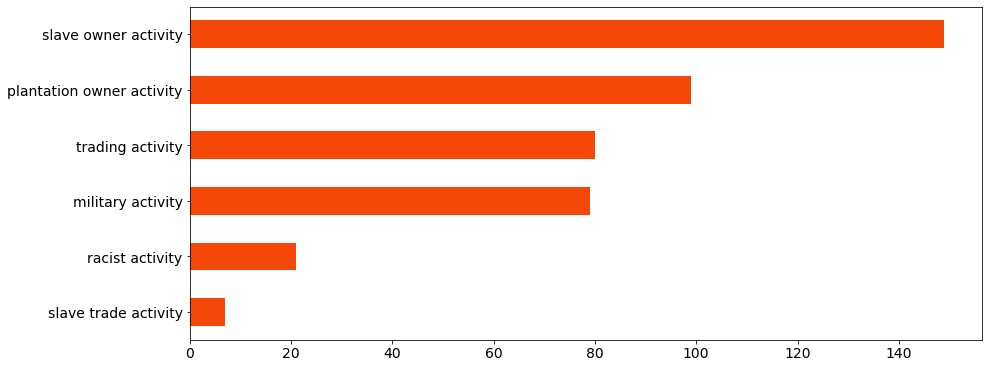

In [330]:
plt.figure(figsize=((25,10)))
ax2 = plt.subplot(2, 2, 2)
series_sorted.plot.barh(color = '#F44708',fontsize=14,rot = 0).get_figure()
plt.savefig('./img/activities_dist_barh.png')
plt.tight_layout()
plt.show()

## Name 

In [331]:
df['last name'] = df['person'].apply(lambda x: x.split()[-1])
df_names = df.drop(df[df['last name'] == '('].index)
df_names = df_names.drop(df_names[df_names['last name'] == ')'].index)
df_names = df_names.drop(df_names[df_names['last name'] == '»'].index)
df_names = df_names.drop(df_names[df_names['last name'] == ''].index)

In [332]:
names = df_names['last name'].value_counts().head(5).sort_values(ascending = True)

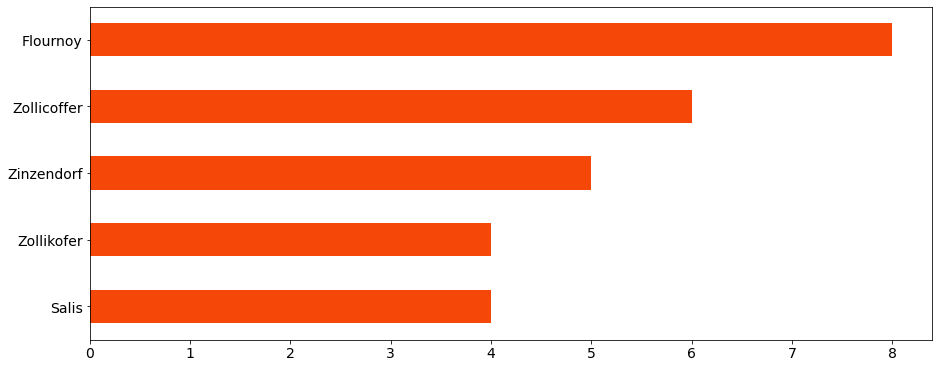

In [333]:
plt.figure(figsize=((25,10)))
ax2 = plt.subplot(2, 2, 2)
names.plot.barh(color = '#F44708',fontsize=14,rot = 0).get_figure()
plt.savefig('./img/names_dis_barh.png')
plt.tight_layout()
plt.show()

In [334]:
names[1:6]

Zollikofer     4
Zinzendorf     5
Zollicoffer    6
Flournoy       8
Name: last name, dtype: int64

In [335]:
df[df['last name']=='Flournoy']

,person,date,origin,colonial_Location,confidence_date,confidence_person,confidence_origin,activities,whole_entry,slave owner activity,trading activity,military activity,plantation owner activity,slave trade activity,racist activity,last name
205,Robert Flournoy,1826-1896,None,Alabama,11.11,14.29,100.00,[slave owner],=> Robert Flournoy (1826-1896) originally from...,True,False,False,False,False,False,Flournoy
237,Robert Flournoy,1763-1825,None,Georgia,25.00,50.00,100.00,"[slave owner, plantation owner]","=> Robert Flournoy (1763-1825), originally fro...",True,False,False,True,False,False,Flournoy
241,Alfred Flournoy,1796-1873,None,Louisiana,16.67,33.33,100.00,[slave owner],"=> Alfred Flournoy (1796-1873), originally fro...",True,False,False,False,False,False,Flournoy
253,Samuel Martin Flournoy,None,None,Alabama,0,10.00,100.00,"[slave owner, military]","=> Samuel Martin Flournoy (1799–1878), origina...",True,False,True,False,False,False,Flournoy
259,Jacob Flournoy,None,None,Alabama,0,4.35,50.00,[slave owner],=> Jacob Flournoy (1663–1725 ) from a Geneva f...,True,False,False,False,False,False,Flournoy
260,Jacob Flournoy,1760-1846,None,Alabama,16.67,8.33,100.00,"[slave owner, plantation owner]","=> Jacob Flournoy (1760-1846), originally from...",True,False,False,True,False,False,Flournoy
261,Thomas Stanhope Flournoy,None,None,Alabama,0,50.00,100.00,"[slave owner, military, trading]","=> Thomas Stanhope Flournoy (1811–1883), origi...",True,True,True,False,False,False,Flournoy
318,John Jacob Flournoy,None,None,Switzerland,0,9.09,100.00,"[slave owner, racist]",=> John Jacob Flournoy (1808–1879) from a fami...,True,False,False,False,False,True,Flournoy
